## Lab Assignment 6 -- Regression
In this lab, you will complete an exercises related to the lecture material on regression. Then, you will compete with your fellow classmates to see who can best predict housing prices.

**IMPORTANT:** Before submitting, make sure you restart the kernel and run all cells sequentially. After all cells have executed, then save the file for submission.  This is very important for grading.

In [2]:
# Don't change this line
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import pandas as pd
np.random.seed(35)

## Exercise 1 -- Generating & Analyzing Fake Data
In this exercise, we will generate some fake data as we did in the lecture on regression trees. Then, we will use it on a series of regression problems.

## Exercise 1a -- Generating the Data
Complete the following steps:
1. Define a function called `generate_data` that takes two arguments, an integer `n` and a boolean `square`. `square` should have a default argument of `False`.
2. Generate an array called `X` and set it equal to `np.random.randn((n,1))`. This creates an $n$-vector of [**standard normal random variables**](https://en.wikipedia.org/wiki/Normal_distribution).
3. Turn `X` into an $nx2$ array by concatenating it with an $n$-vector of ones (**Hint**: use `np.ones((n,1))` and `np.concatenate()`). Make sure that the array of ones serves as the first column.
3. Define an array called `beta` and set it equal to the array [1, 3.14]
4. Define a variable called `epsilon` and set it equal to `np.random.randn(n)*0.3`
5. Then, using `X`, `beta`, and `epsilon`, create a variable named `y` which is equal to
    - `np.matmul(X, beta) + epsilon` if square is `False`
    - `np.matmul(X ** 2, beta) + epsilon` if `square` is `True`.
    
6. Your output should return `X`and `y`
7. Test your function in the cell below with `n=100` and no argument for `square`. Save the output to `X100` and `y100` respectively. Afterwards, print `y100[50]`.

Answer the following questions in the Markdown cell below:
1. Is this a bivariate or multivariate linear regression model? Why?
2. What is the purpose of  including this `epsilon`? What aspect of real data are we trying to mimic?

In [5]:
def generate_data(n, square=False):
    n = int(n)
    square == False
    X = np.random.randn(n,1)
    X = np.concatenate((np.ones((n,1)), X), axis=1)
    beta = np.array([1, 3.14])
    epsilon = np.random.randn(n)*0.3
    y = np.matmul(X, beta) + epsilon if not square else np.matmul(X ** 2, beta) + epsilon
    return X, y

note to self: X = np.random.randn((n,1)) two brackets IS A TUPLE!

In [8]:
# Exercise 1a -- Test function and print
n = 100
X100 = generate_data(n)[0]
y100 = generate_data(n)[1]
y100[50]

6.328519071803721

### Reponse to Exercise 1a


1.   This is a bivariate linear regression model because there is an independent variable X and dependent variable Y.
2.   The purpose of including this epsilon is to capture the error on X's effect on Y. This mimics the fact that other hidden factors could influence Y more in the real data or the difference between the exactness of the best-fit line (coefficient).



## Exercise 1b -- Standard Linear Regression
Using `sklearn`, fit a linear regression model on `y100` and `X100`. When intializing your model, set `fit_intercept` equal to `False` and call your linear model `lr_model_1`. Then, print the estimated coefficients and answer the following question in the Markdown cell below.
- What are the coefficient estimates? What values are they close to? Why does this make sense?



In [9]:
# Exercise 1b -- fit regression

from sklearn import linear_model

lr_model_1 = linear_model.LinearRegression(fit_intercept=False)

lr_model_1.fit(X100, y100)
print(lr_model_1.coef_)

[ 1.2029067  -0.32111851]


### Response to Exercise 1b
The values are close to B0 and B1 [1, 3.14] but B1 is off. This may mean error is large for that predictor.

## Exercise 1c -- Linear Regression with Quadratic Terms
Using `generate_data(100, True)`, create two variables `y100_2` and `X100_2`. Then, repeat the steps from **Exercise 1b** above using `X100_2` and `y100_2` instead of `X_100` and `y_100`.  Call your new model `linear_model_2`.

Answer the following questions in the Markdown cell below:

1. What are the coefficient estimates? Are they similar to the coefficients from **Exercise 1b**? Why or why not?

If your estimates were not similar, create a variable `X100_2_sq` in the third cell below that can be used instead of `X100_2` so that your estimates are similar again. Repeat the same process again but call your `lr_model_3`. Print your new estimated coefficients.

In the markdown cell below, answer the following question:

2. How did you modify `X100_2` to attain similar coefficients? Why did this work?

In [10]:
# Exercise 1c -- generate variables and repeat regression fit

y100_2 = generate_data(100, True)[1]
X100_2 = generate_data(100, True)[0]

lr_model_2 = linear_model.LinearRegression(fit_intercept=False)
lr_model_2.fit(X100_2, y100_2)
print(lr_model_2.coef_)

[4.12325731 0.03405685]


### Response to Exercise 1c -- Question 1
The coefficient estimates are [4.12325731 0.03405685]. They are different and larger because of the squared == True for X in model _2. The values are then calculated based on Xsqrd times B1 = 0 for B0 instead of model _1's X times B1 = 0.

In [16]:
# Exercise 1c -- modify X100_2 and run new regression

y100_2_sq = generate_data(5,True)[1]
X100_2_sq = generate_data(5,True)[0]

lr_model_3 = linear_model.LinearRegression(fit_intercept=False)
lr_model_3.fit(X100_2_sq, y100_2_sq)
print(lr_model_3.coef_)

[1.93105159 1.55153726]


### Response to Exercise 1c -- Quesiton 2
Since the variable name is 2_sq, I kept sqrd==True and modified the first value. Since already squared, it will get larger so I used a value smaller than 100 to get desired results. HOWEVER, I re-ran the regression code multiple times for the best value of 1.93 and 1.55.

### Exercise 1d -- Unnecessary Quadratic Terms
Now we are going to see what happens when we estimate a model that only has linear terms using both linear and quadratic terms. Complete the following steps:
1. Create an $nx3$ array called `X100_ext` by concatenating `X100` with a column that is equal to the square of elements in the second column. Make sure this new column is the third column. Note that `np.concatenate` requires that both arrays are of the same dimension. You may have to use the method [`.reshape()`](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html).
2. Now repeat the steps of **Exercise 1b** with `X100_ext`. Make sure you print the estimated coefficients.

Answer the following questions in the Markdown cell below:
1. Are the first two coefficients different from their respective counterparts in part **Exercise 1b**? Why do you think this is?
2.  Is the third coeffcient close to 0 or large? Why do you think this is?
3. Do you think these estimates are accurate?

In [17]:
# Exercise 1d -- Create X100_ext here
X100_ext = np.concatenate((X100, X100[:,1].reshape(-1,1)**2), axis=1)

In [18]:
# Exercise 1d -- Repeat exercise 1b here
lr_model_4 = linear_model.LinearRegression(fit_intercept=False)

lr_model_4.fit(X100_ext, y100)
print(lr_model_4.coef_)

[ 1.08062511 -0.29243049  0.11837331]


In [19]:
test = linear_model.LinearRegression(fit_intercept=False)

test.fit(X100_ext, y100_2)
print(test.coef_)

[3.52496389 0.58898457 0.62374241]


### Response to Exercise 1d


1.   The first two coefficients are different from their respective counterparts in part Exercise 1b because of the SQUARING of the reshaped X100 (without the square). It is different with 1c because it squares AFTER the reshaping, i.e. the square of the concacenated X100 and squared elements (1st and 2nd columnds).
2.   The third coeffcient is close to 0. That may be mean there is little relationship between the concacenated column values to y100 (not squared, as copied from 1b), given that the third column is squared. As tested above, with y100_2, the third coefficient is more significant.
3.   These estimates cannot guarantee to be accurate given we do not have p-values or t-stats. However, I just re-ran the regression below with those values: 1.08 (**first coefficient** of y100 and X100) is significnat and positively correlates given that both are not squared. **Second and third** coefficients are not as significant since y100 is not squared but 2nd column are squared elements and X100_ext are squared after the concacenation too.

In [20]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X = X100_ext
y = y100

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.5722
Date:                Thu, 01 Aug 2024   Prob (F-statistic):              0.566
Time:                        16:59:36   Log-Likelihood:                -261.98
No. Observations:                 100   AIC:                             530.0
Df Residuals:                      97   BIC:                             537.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0806      0.438      2.468      0.0

## Exercise 1e -- Regression Plots
Following the notes in the plotting lectures complete the following steps:
1. Using `subplots()` initialize a figure with 4 figures in a $2x2$ grid
2. Plot the following in the indicated location.
    - **Top-left**  -- a line plot of `lr_model_1` and a scatter plot of the data used to generate `lr_model_1`.
    - **Bottom-left**  -- a line plot of `lr_model_2` and a scatter plot of the data used to generate `lr_model_2`
    - **Bottom-right** -- a line plot of `lr_model_3` and a scatter plot of the data used to generate `lr_model_3`
    - **Top-right** -- a line plot of `lr_model_4` and a scatter plot of the data used to generate `lr_model_4`
    
For the plots above,
- make your lines red,
- title your plots (e.g. "Linear Model 1"),
- use `np.linspace(-4,4,200)` as your domain when plotting the lines,
- call `fig.tight_layout()` so your plot is not cluttered

3. Using the `metrics` submodule of `sklearn`, print the `in-sample` mean squared errors of each model using f strings. Your stings should looke like this: "MSE of Linear Model 1 is .3"  
**Hints:** .
- To plot on the top left axis, you will need to work with `axes.flat[0]` . The remaining axes are indexed by 1, 2, and 3.
- If you choose to used the `.predict()` to plot your lines, keep in mind you need to provide it with the correctly shaped input.
- When calculating the means within a loop, it may hep to create a list that contains the four linear models.


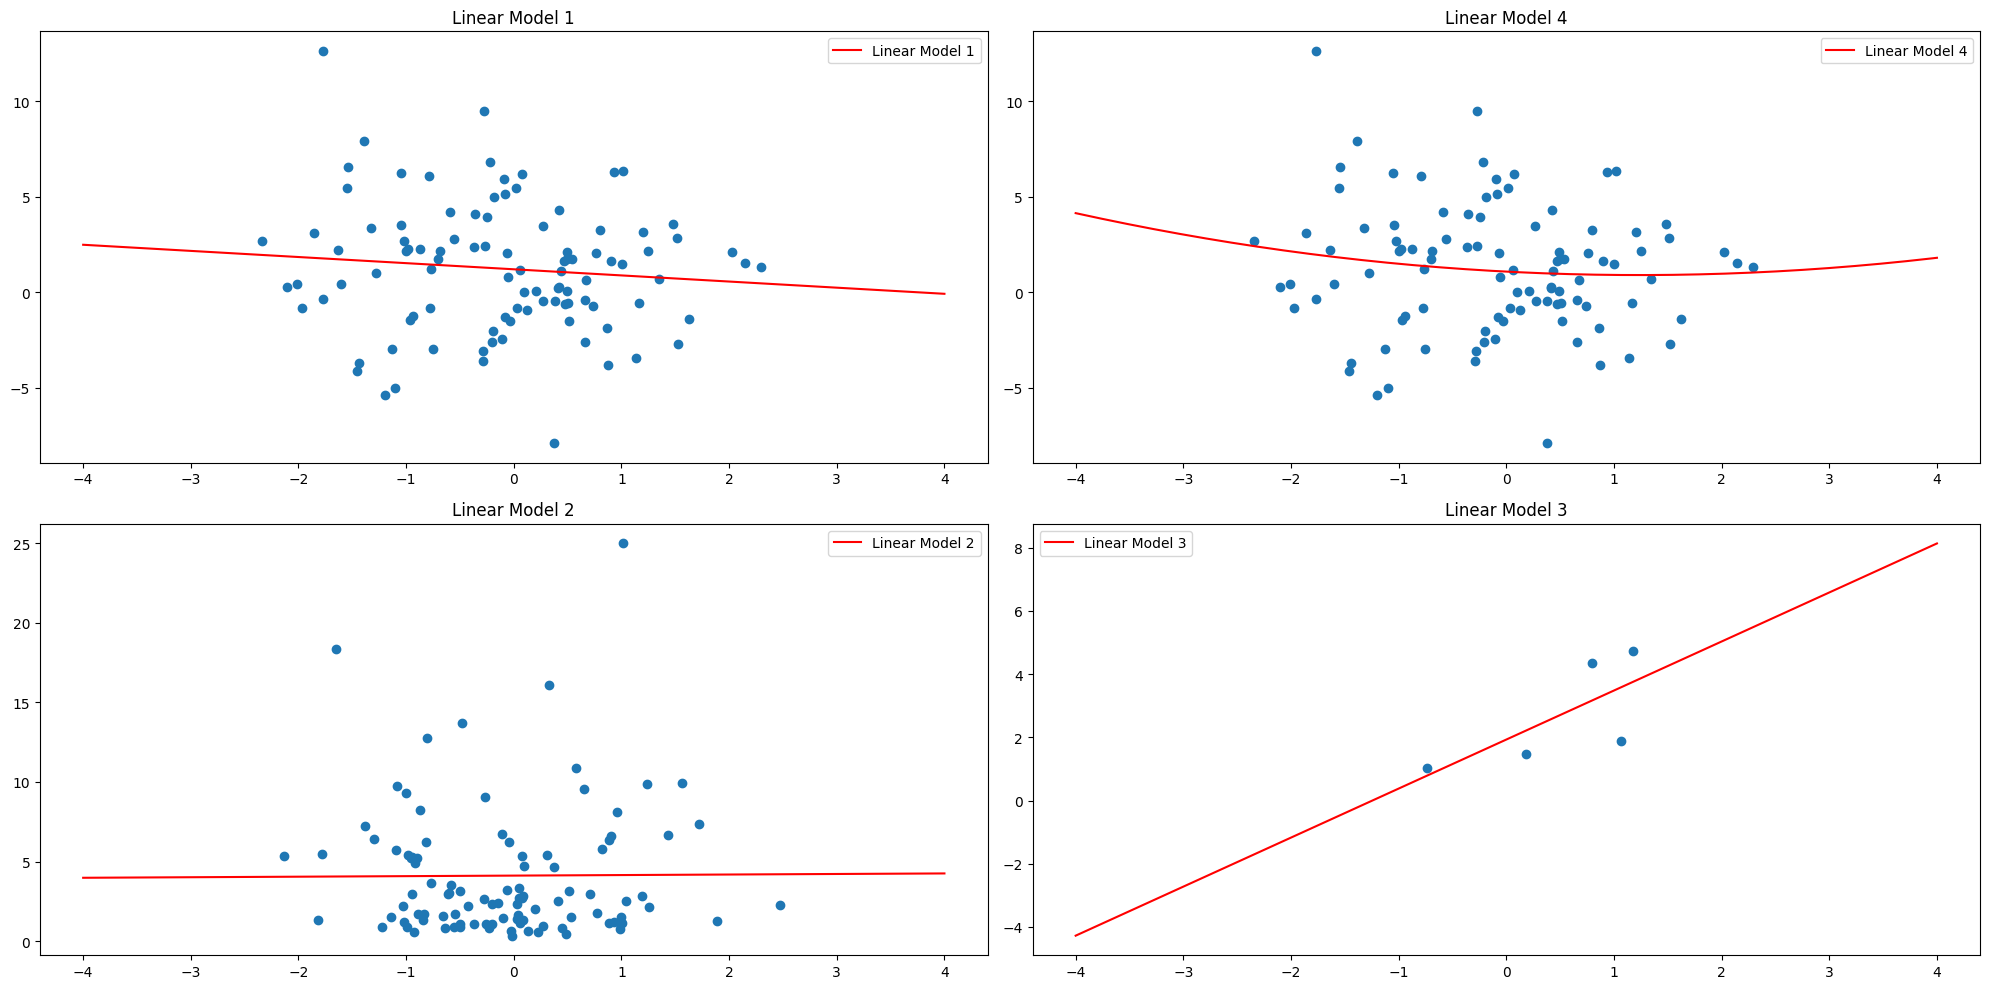

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
domain = np.linspace(-4,4,200)

# Exercise 1e -- plots
titles = ['Linear Model 1', 'Linear Model 2', 'Linear Model 3', 'Linear Model 4']

axes.flat[0].scatter(X100[:,1],y100)
axes.flat[0].plot(domain, lr_model_1.predict(np.c_[np.ones(len(domain)), domain]),color='red', label='Linear Model 1')
axes.flat[0].set_title(titles[0])
axes.flat[0].legend()

axes.flat[2].scatter(X100_2[:,1],y100_2)
axes.flat[2].plot(domain, lr_model_2.predict(np.c_[np.ones(len(domain)), domain]), color='red', label='Linear Model 2')
axes.flat[2].set_title(titles[1])
axes.flat[2].legend()

axes.flat[3].scatter(X100_2_sq[:,1],y100_2_sq)
axes.flat[3].plot(domain, lr_model_3.predict(np.c_[np.ones(len(domain)), domain]),color='red', label='Linear Model 3')
axes.flat[3].set_title(titles[2])
axes.flat[3].legend()

axes.flat[1].scatter(X100_ext[:,1],y100)
axes.flat[1].plot(domain, lr_model_4.predict(np.c_[np.ones(len(domain)), domain,domain**2]),color='red', label='Linear Model 4')
axes.flat[1].set_title(titles[3])
axes.flat[1].legend()

fig.tight_layout()

In [22]:
# Exercise 1e -- mean squared errors

print(f"MSE of Linear Model 1 is {metrics.mean_squared_error(y100, lr_model_1.predict(X100))}")
print(f"MSE of Linear Model 2 is {metrics.mean_squared_error(y100_2, lr_model_2.predict(X100_2))}")
print(f"MSE of Linear Model 3 is {metrics.mean_squared_error(y100_2_sq, lr_model_3.predict(X100_2_sq))}")
print(f"MSE of Linear Model 4 is {metrics.mean_squared_error(y100, lr_model_4.predict(X100_ext))}")

MSE of Linear Model 1 is 11.06423942264077
MSE of Linear Model 2 is 16.875069992000007
MSE of Linear Model 3 is 1.166740940379426
MSE of Linear Model 4 is 11.041998549803033


**Evidently, Linear Model 3 (squared) has the best-fit, with the quadratic following but worse by almost 10 points.**

### Exercise 1f -- Functional Misspecification
**Functional Misspecification** is used to describe the situation where the functional form of the regression model we are estimating is not the same as the functional form of the true data generating process. Answer the following question in the markdown cell below:
- Which of the four linear models do you think are well-specified? Which ones are not? Is including extra terms problematic when it comes to being well-specified. What about excluding the terms found in the true data generating process?
- How does misspecification manifest itself in the plots? How about in the mean squared errors?
- After doing this exercise, do you think it is important to investigate the relationship between variables before determining your regression specification? Why or why not?

### Response to Exercise 1f


1.   To help answer this question, the above shows model 3 to have the best-fitting line close to the data AND minimum MSE. The other three are not well-specified because data is scattered and hard to represent by a linear line (i.e., data is nonlinear but used linear regression). Including extra terms is problematic when it comes to being well-specified because such could be noise. It is useful to EXCLUDE insignificant and noisy outliers or factors and values in the TEST and TRAIN sets, not the true data.
2.   Misspecification manifests itself through the misalignment of the scatter (data) and the regression line. The mean squared errors show misspecification from model 1, 2, and 4's values greatly deviating from 0.
3.   It is important to investigate the relationship between variables before determining your regression specification because 1) linearity of the data nature is important to using a completely wrong model, especially consequential if used for decision algorithms later and 2) understanding variable relationships is useful to choose the best model for fit and prediction, and makes interpretation and the narrative more interesting.



In [32]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

model1 = sm.OLS(y100, X100, missing='drop')
model1_result = model1.fit()

model2 = sm.OLS(y100_2, X100_2, missing='drop')
model2_result = model2.fit()

model3 = sm.OLS(y100_2_sq, X100_2_sq, missing='drop')
model3_result = model3.fit()

model4 = sm.OLS(y100, X100_ext, missing='drop')
model4_result = model4.fit()

print(model1_result.summary())
print(model2_result.summary())
print(model3_result.summary())
print(model4_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9568
Date:                Thu, 01 Aug 2024   Prob (F-statistic):              0.330
Time:                        17:51:06   Log-Likelihood:                -262.08
No. Observations:                 100   AIC:                             528.2
Df Residuals:                      98   BIC:                             533.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2029      0.338      3.559      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


### Exercise 1g -- Lasso
Finally, we will run lasso on our fake data. Complete the following steps:
1. Generate `X1000` and `y1000` using `generate_data(1000)`
2. Create an `1000x3` array called `X1000_ext` which is created in a anaglous fashion to `X100_ext`.
3. Follow the lecture notes to create a standardized version of `X1000_ext` called `X1000_ext_scl`. You will need to import the `preprocessing` submodule of sklearn.
4. Check to make sure your means and variances. You should see that everything looks good except for our intercept has a variance of $0$. You actually do not want to standardize an intercept but we still need it! Replace the first column of  `X1000_ext_scl` with a fresh column of ones using `np.ones(1000)`.
5. Create a dataframe version of `X1000_ext_scl` called `X_lasso_df` and rename the columns to "intercept", "x", and "x_sq" respectively.Then call `X_lasso_df` at the bottom of the cell.
6. Copy and paste the Lasso path code from the lecture notes into the second cell below. Adapt it so it works for `X_lasso_df` and `y1000`.


In the Markdown cell below, answer the following questions:
1. Characterize `X_sq`'s lasso path. Why was this behavior predictable?    Reference linear model 4 or the true DGP in your answer.
2. Without checking, do you think a low or high value for alpha would be chosen by cross validation? To help you answer this question, think about what the true coefficients are and whether or not higher alphas bring the lasso coefficients closer to their true counterparts or farther away.

**I did NOT use np.ones(1000) due to the differece in shape (1000).**

In [57]:
# Exercise 1g -- Steps 1-5
X1000 = generate_data(1000)[0]
y1000 = generate_data(1000)[1]
X1000_ext = np.concatenate((X100, X100[:,1].reshape(-1,1)**2), axis=1)

from sklearn import preprocessing
# This teaches our scaler how to standardize the data from X
scaler = preprocessing.StandardScaler().fit(X1000_ext)

# This applies the standardization to X
X1000_ext_scl = scaler.transform(X1000_ext)

# We can see variances and means of columns are roughly 1 an 0
print(X1000_ext_scl.var(axis = 0))
print(X1000_ext_scl.mean(axis = 0))

X1000_ext_scl[:,0] = 1
X1000_ext_scl

X_lasso_df = pd.DataFrame(X1000_ext_scl)
X_lasso_df.columns = ['intercept', 'x', 'x_sq']
X_lasso_df

[0. 1. 1.]
[ 0.00000000e+00 -3.08086889e-17 -3.10862447e-17]


,intercept,x,x_sq
0,1.0,-0.436857,-0.581963
1,1.0,1.596441,0.977683
2,1.0,-0.564152,-0.455211
3,1.0,-0.991731,0.164106
4,1.0,-0.157650,-0.767374
...,...,...,...
95,1.0,2.086112,2.361236
96,1.0,0.566206,-0.655678
97,1.0,0.480116,-0.713758
98,1.0,0.751610,-0.489528


In [76]:
# Exercise 1g -- Step 5 copy code here

# Step1: Initialize lasso model
lasso_model = linear_model.Lasso(alpha = 1, max_iter =10000)
lr_model = linear_model.LinearRegression()
lr_model.fit(X_lasso_df, y1000[900:,])

# Step2: Fit model
lasso_model.fit(X_lasso_df, y1000[900:,])

# Get lasso coefs
lasso_coefs = pd.Series(dict(zip(X_lasso_df.columns, lasso_model.coef_)))

# Get Linear Regression coefs
lr_coefs = pd.Series(dict(zip(X_lasso_df.columns, lr_model.coef_)))

# Look at the two together
coefs = pd.DataFrame(dict(lasso=lasso_coefs, linreg=lr_coefs))
coefs

,lasso,linreg
intercept,0.0,0.000000
x,0.0,0.081134
x_sq,-0.0,-0.637548


### Response to Exercise 1g


1.   X_sq is not only not correlating with y1000 but is also negative. This is predictable because y1000 has DEFAULT no squared values. The latter phenomenon is similar to linear model 4's X100_ext with 3 columns, squared AFTER the reshape, while y100 has 4 columns. The true DGP (**data-generating process**) is best with linear relationships given these are array values.

2.   A **higher alpha means** stronger penalty but also tendency to have Type I error occur (saying there is xx when there isn't) but lowers Type II error (saying there isn't but there is). Higher alphas could restrict the model to predict under 'fear of NOT rejecting null' and so it is better to have a LOW alpha to evaluate the model accuracy. However, higher alphas mean CLOSER to 0 and our coefficients reflect close to 0 values.




In [80]:
lr_model.coef_
lasso_model.coef_

array([ 0.,  0., -0.])